In [8]:
import numpy as np
import scipy.special as spl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
import math

data_frame = pd.read_csv("Jhonson.csv")
#Se dividen en arreglos cada columna
x = data_frame['long_onda']                    #(Ya son listas que dependen de X)
n = data_frame['n']
k = data_frame['k']

f_n = InterpolatedUnivariateSpline(x, n, k=3)  #Interpolación de n
f_k = InterpolatedUnivariateSpline(x, k, k=3)  #Interpolación de k


lam = np.linspace(200, 800, 2500)      ##Lambda: inicio, fin, intervalo 
num_lam = 2500                        ##Entradas/puntos
n_Au = f_n(lam) + 1j*f_k(lam) 
n_m = 1.333                           #indice del agua 

a = 16e-9                           #Radio de la particula
b = 45e-9
              
##Obtención de los coeficientes de Mie##
def mie_coeff(n,x,z):
    #Funciones de Bessel y Hankel
    jnx = spl.spherical_jn(n,x)
    jnx_1 = spl.spherical_jn(n-1,x)
    ynx = spl.spherical_yn(n,x)
    ynx_1 = spl.spherical_yn(n-1,x)
    jnz = spl.spherical_jn(n,z)
    jnz_1 = spl.spherical_jn(n-1,z)
    hnx = jnx+1j*ynx
    hnx_1 = jnx_1 + 1j*ynx_1
    
    #Derivadas
    x_jnxp = x*jnx_1-n*jnx
    z_jnzp = z*jnz_1-n*jnz
    x_hnxp = x*hnx_1-n*hnx
    
    #Coeficientes de Mie
    an = ((m**2)*jnz*x_jnxp-jnx*z_jnzp)/((m**2)*jnz*x_hnxp-hnx*z_jnzp)
    bn = (jnz*x_jnxp-jnx*z_jnzp)/(jnz*x_hnxp-hnx*z_jnzp)  
    return(an,bn)


##Secciones efiaces radio a
Qsca = np.zeros(num_lam)   #Tuplas vacias de longitud intervalos de lambda
Qext = np.zeros(num_lam)
Csca = np.zeros(num_lam)
Cext = np.zeros(num_lam)    
   
                                                         
k = 2*np.pi/(lam*1e-9)*n_m
x = (k*a).astype(complex)     ##Parametro de tamaño
m = n_Au/n_m                   ##Indice de refracción relativo

 #Limite de sumaRedondear entero hacia arriba 
t = lambda r,x1: 2*np.pi*a/((x1)*n_m)    #Funcion de parametro de tamaño
N = lambda r: math.ceil(t(a,206.6)+4*np.cbrt(t(a,206.6))+2)   
       
z=m*x  
d0 = 1e7 
n0 = 5.07e-6
for n in range(1,N(a)):
    [an,bn] = mie_coeff(n,x,z)

    Csca = Csca + (2*np.pi/(k**2))*(((2*n+1)*(abs(an**2)))+((2*n+1)*(abs(bn**2))))
    Cext = Cext + ((2*np.pi/(k**2))*(2*n+1)*np.real(an+bn))
    
    Cgeom = np.pi*(a**2)
        
    Qsca = Csca/Cgeom
    Qext = Cext/Cgeom
    Qabs = Qext-Qsca
    Abs = (np.pi*a**2*Qext*d0*n0)/2.303
    
##Secciones efiaces radio b
Qscab = np.zeros(num_lam)   #Tuplas vacias de longitud intervalos de lambda
Qextb = np.zeros(num_lam)
Cscab = np.zeros(num_lam)
Cextb = np.zeros(num_lam)    

xb = (k*b).astype(complex)     ##Parametro de tamaño

 #Limite de sumaRedondear entero hacia arriba 
tb = lambda r,x1: 2*np.pi*b/((x1)*n_m)    #Funcion de parametro de tamaño
N = lambda r: math.ceil(tb(b,206.6)+4*np.cbrt(tb(b,206.6))+2)   
       
zb=m*xb 

for n in range(1,N(b)):
    [an,bn] = mie_coeff(n,xb,zb)

    Cscab = Cscab + (2*np.pi/(k**2))*(((2*n+1)*(abs(an**2)))+((2*n+1)*(abs(bn**2))))
    Cextb = Cextb + ((2*np.pi/(k**2))*(2*n+1)*np.real(an+bn))
    
    Cgeomb = np.pi*(b**2)
        
    Qscab = Cscab/Cgeomb
    Qextb = Cextb/Cgeomb
    Qabsb = Qextb-Qscab
    Absb = (np.pi*b**2*Qextb*d0*n0)/2.303


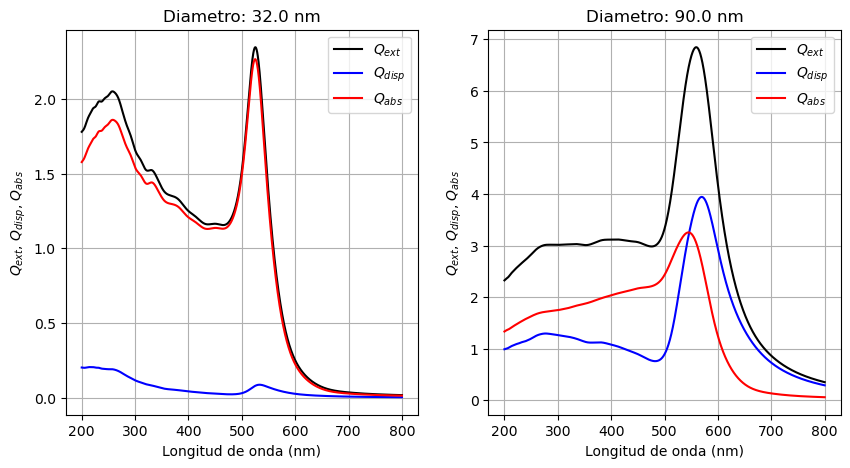

In [12]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
##Diámetro a
ax[0].plot(lam, Qext, label='$Q_{ext}$', color='k')
#ax[0].plot(lam, Abs, label='$Abs$', color='b')
ax[0].plot(lam, Qsca, label='$Q_{disp}$', color='b')      #Graficamos n
ax[0].plot(lam, Qabs, label='$Q_{abs}$', color='r')

ax[0].set_ylabel('$Q_{ext}$, $Q_{disp}$, $Q_{abs}$')
ax[0].set_xlabel('Longitud de onda (nm)')
ax[0].set_title('Diametro: '+str(2*a*1e9)+' nm' )
ax[0].legend(loc='best')
ax[0].grid()

#Diámetro b
ax[1].plot(lam, Qextb, label='$Q_{ext}$', color='k')
#ax[1].plot(lam, Absb, label='$Abs$', color='b')
ax[1].plot(lam, Qscab, label='$Q_{disp}$', color='b')      #Graficamos n
ax[1].plot(lam, Qabsb, label='$Q_{abs}$', color='r')

ax[1].set_ylabel('$Q_{ext}$, $Q_{disp}$, $Q_{abs}$')
ax[1].set_xlabel('Longitud de onda (nm)')
ax[1].set_title('Diametro: '+str(2*b*1e9)+' nm' )
ax[1].legend(loc='best')
ax[1].grid()




